In [1]:
import pandas as pd
import os
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
test_val_heuristic = pd.read_excel("./Stats_metric/test_val_heuristic.xlsx")
test_val_llm = pd.read_excel("./Stats_metric/test_val_llm.xlsx")
test_bonus_val_llm = pd.read_excel("./Stats_metric/test_bonus_val_llm.xlsx")

test_second_query = pd.read_excel("./Stats_metric/test_second_query.xlsx")

test_third_val_heuristic = pd.read_excel("./Stats_metric/test_third_val_heuristic.xlsx")
test_third_val_llm = pd.read_excel("./Stats_metric/test_third_val_llm.xlsx")
test_bonus_third_val_llm = pd.read_excel("./Stats_metric/test_bonus_third_val_llm.xlsx")

print("Heuristic data:")
print(test_val_heuristic.head())
print("\nLLM data:")
print(test_val_llm.head())
print(50*'-')

print("Heuristic third query data:")
print(test_third_val_heuristic.head())
print("\nLLM third query data:")
print(test_bonus_third_val_llm.head())
print(50*'-')

Heuristic data:
                                                 Row Pred_type  Type
0  ['Екатеринбург', '4 Екатеринбург', 'Независима...      info     1
1  ['АДЛ+п_1', '', 'ООО "Клиника "Аллергомед"', '...      info     1
2  ['Санкт-Петербург', '3 люкс', 'Военно-медицинс...      info     1
3  ['Санкт-Петербург', '3 люкс', 'МЦ Двадцать пер...      info     1
4  ['006_Б', 'Екатеринбург', 'ГБУЗ СО "Центральна...      info     1

LLM data:
                                                 Row Pred_type  Type
0  ['Перечень Лечебно-профилактических учреждений...     empty     0
1  ['Unnamed: 0', 'Перечень Лечебно-профилактичес...     empty     0
2                 ['', 'Новосибирск', 'Новосибирск']     empty     0
3              ['', '№1Стандарт', 'Санкт-Петербург']     empty     0
4         ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']     empty     0
--------------------------------------------------
Heuristic third query data:
                                            Address1  \
0         

In [3]:
label_mapping = {"empty": 0, "info": 1, "header": 2}
test_val_heuristic["Pred_type"] = test_val_heuristic["Pred_type"].map(label_mapping)
test_val_llm["Pred_type"] = test_val_llm["Pred_type"].map(label_mapping)
test_bonus_val_llm["Pred_type"] = test_bonus_val_llm["Pred_type"].map(label_mapping)

print("\nAfter mapping:")
print(50*'-')
print("Heuristic Pred_type values:", test_val_heuristic["Pred_type"].unique())
print("LLM Pred_type values:", test_val_llm["Pred_type"].unique())
print("LLM Bonus Pred_type values:", test_bonus_val_llm["Pred_type"].unique())
print(50*'-')
print("Heuristic Pred_type third query values:", test_third_val_heuristic["Pred_type"].unique())
print("LLM Pred_type third query values:", test_third_val_llm["Pred_type"].unique())
print("LLM Bonus Pred_type third query values:", test_bonus_third_val_llm["Pred_type"].unique())
print(50*'-')


After mapping:
--------------------------------------------------
Heuristic Pred_type values: [1 0]
LLM Pred_type values: [0 2]
LLM Bonus Pred_type values: [2 0 1]
--------------------------------------------------
Heuristic Pred_type third query values: ['нет' 'да']
LLM Pred_type third query values: ['нет']
LLM Bonus Pred_type third query values: ['нет' 'да']
--------------------------------------------------


In [4]:
def calculate_accuracy(df):
    correct = (df["Pred_type"] == df["Type"]).sum()
    total = len(df)
    return correct / total

def calculate_second_accuracy(df):
    #TODO
    correct = (df["Pred_type"] == df["Type"]).sum()
    total = len(df)
    return correct / total


In [5]:
accuracy_heuristic = calculate_accuracy(test_val_heuristic)
accuracy_llm = calculate_accuracy(test_val_llm)
accuracy_bonus_llm = calculate_accuracy(test_bonus_val_llm)

print("\nAccuracy first query:")
print(50*'-')
print(f"Heuristic: {accuracy_heuristic:.4f}")
print(f"LLM: {accuracy_llm:.4f}")

print(50*'-')

accuracy_third_heuristic = calculate_accuracy(test_third_val_heuristic)
accuracy_third_llm = calculate_accuracy(test_third_val_llm)
accuracy_bonus_third_llm = calculate_accuracy(test_bonus_third_val_llm)

print("\nAccuracy third query:")
print(50*'-')
print(f"Heuristic: {accuracy_third_heuristic:.4f}")
print(f"LLM: {accuracy_third_llm:.4f}")
print(50*'-')


Accuracy first query:
--------------------------------------------------
Heuristic: 1.0000
LLM: 0.9444
--------------------------------------------------

Accuracy third query:
--------------------------------------------------
Heuristic: 1.0000
LLM: 0.7500
--------------------------------------------------


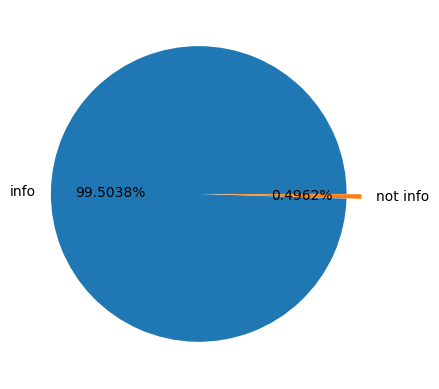

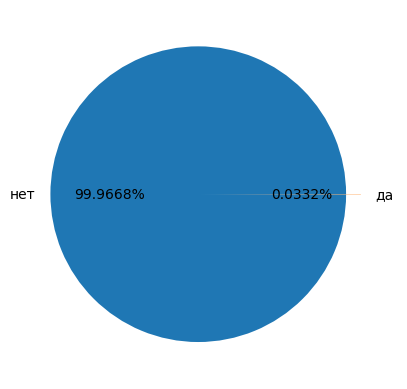

In [6]:
df1 = pd.read_excel("./Stats/test_val_heuristic.xlsx")
proc_heur1 = len(df1[df1["Pred_type"] == "info"]) / len(df1)

sizes1 = [proc_heur1, 1 - proc_heur1]
labels1 = ["info", "not info"]
explode = (0.1, 0)
plt.pie(sizes1, explode=explode, labels=labels1, autopct='%1.4f%%')
plt.show()
df3 = pd.read_excel("./Stats/test_third_val_heuristic.xlsx")
proc_heur3 = len(df3[df3["Pred_type"] == "нет"]) / len(df3)

sizes3 = [proc_heur3, 1 - proc_heur3]
labels3 = ["нет", "да"]
explode = (0.1, 0)
plt.pie(sizes3, explode=explode, labels=labels3, autopct='%1.4f%%')
plt.show()


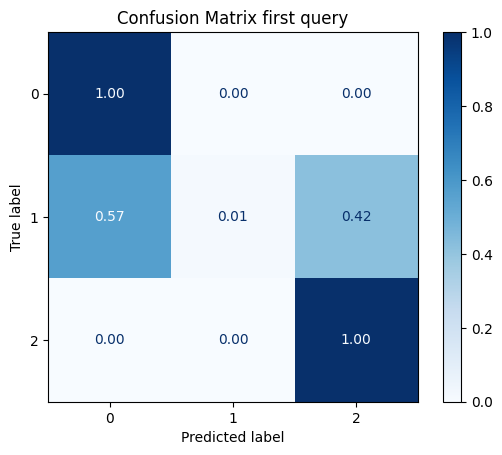

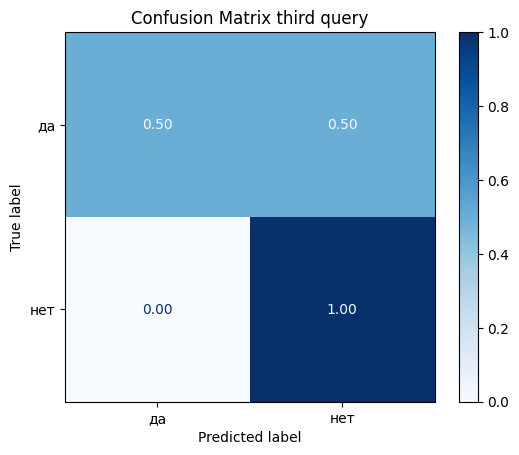

In [7]:
y_true = test_bonus_val_llm["Type"]
y_pred = test_bonus_val_llm["Pred_type"]
cm = confusion_matrix(y_true, y_pred, normalize = "true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix first query')
plt.show()

y_true = test_bonus_third_val_llm["Type"]
y_pred = test_bonus_third_val_llm["Pred_type"]
cm = confusion_matrix(y_true, y_pred, normalize = "true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["да", "нет"])
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix third query')
plt.show()

In [8]:
def calculate_class_accuracy(df):
    class_acc = {}
    for class_label in [0, 1, 2]:
        class_df = df[df["Type"] == class_label]
        correct = (class_df["Pred_type"] == class_df["Type"]).sum()
        total = len(class_df)
        class_acc[class_label] = correct / total if total > 0 else 0.0
    return class_acc

class_acc_heuristic = calculate_class_accuracy(test_val_heuristic)
class_acc_llm = calculate_class_accuracy(test_val_llm)
class_acc_bonus_llm = calculate_class_accuracy(test_bonus_val_llm)

print("\nClass Accuracy (Heuristic):")
print(50*'-')
for label, acc in class_acc_heuristic.items():
    print(f"Class {label}: {acc:.4f}")
print(50*'-')

print("\nClass Accuracy (LLM):")
print(50*'-')
for label, acc in class_acc_llm.items():
    print(f"Class {label}: {acc:.4f}")
print(50*'-')


Class Accuracy (Heuristic):
--------------------------------------------------
Class 0: 1.0000
Class 1: 1.0000
Class 2: 0.0000
--------------------------------------------------

Class Accuracy (LLM):
--------------------------------------------------
Class 0: 1.0000
Class 1: 0.0000
Class 2: 0.5000
--------------------------------------------------


In [9]:
combined_df = pd.concat([test_val_heuristic, test_val_llm], ignore_index=True)

accuracy_combined = calculate_accuracy(combined_df)
print("First query:")
print(50*"-")
print(f"\nCombined Accuracy: {accuracy_combined:.4f}")
print(50*'-')

combined_df3 = pd.concat([test_third_val_heuristic, test_third_val_llm], ignore_index=True)

accuracy_combined = calculate_accuracy(combined_df3)
print("Third query:")
print(50*"-")
print(f"\nCombined Accuracy: {accuracy_combined:.4f}")
print(50*'-')

First query:
--------------------------------------------------

Combined Accuracy: 0.9915
--------------------------------------------------
Third query:
--------------------------------------------------

Combined Accuracy: 0.9904
--------------------------------------------------


In [10]:
combined_df = pd.concat([test_val_heuristic, test_val_llm], ignore_index=True)

accuracy_combined = calculate_accuracy(combined_df)
print("First query:")
print(50*"-")
print(f"\nCombined Accuracy: {accuracy_combined:.4f}")
print(50*'-')
class_acc_combined = calculate_class_accuracy(combined_df)
print("\nCombined Class Accuracy:")
print(50*'-')
for label, acc in class_acc_combined.items():
    print(f"Class {label}: {acc:.4f}")
print(50*'-')

First query:
--------------------------------------------------

Combined Accuracy: 0.9915
--------------------------------------------------

Combined Class Accuracy:
--------------------------------------------------
Class 0: 1.0000
Class 1: 1.0000
Class 2: 0.5000
--------------------------------------------------


In [11]:
def calculate_token_f1(df):
    y_true = df["Type"]
    y_pred = df["Pred_type"]

    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2])
    
    report = classification_report(y_true, y_pred, labels=[0, 1, 2], target_names=["empty", "info", "header"], output_dict=True)
    
    return {
        "f1_micro": f1_micro,
        "f1_per_class": dict(zip([0, 1, 2], f1_per_class)),
        "report": report
    }

f1_heuristic = calculate_token_f1(test_val_heuristic)
f1_llm = calculate_token_f1(test_val_llm)
f1_bonus_llm = calculate_token_f1(test_bonus_val_llm)
f1_combined = calculate_token_f1(combined_df)

print("\nToken-level F1 (Heuristic):")
print(f"Micro F1: {f1_heuristic['f1_micro']:.4f}")
print("Per-class F1:", {k: f"{v:.4f}" for k, v in f1_heuristic['f1_per_class'].items()})
print(50*'-')

print("\nToken-level F1 (LLM):")
print(f"Micro F1: {f1_llm['f1_micro']:.4f}")
print("Per-class F1:", {k: f"{v:.4f}" for k, v in f1_llm['f1_per_class'].items()})
print(50*'-')

print("\nToken-level F1 (Combined):")
print(f"Micro F1: {f1_combined['f1_micro']:.4f}")
print("Per-class F1:", {k: f"{v:.4f}" for k, v in f1_combined['f1_per_class'].items()})
print(50*'-')


Token-level F1 (Heuristic):
Micro F1: 1.0000
Per-class F1: {0: '1.0000', 1: '1.0000', 2: '0.0000'}
--------------------------------------------------

Token-level F1 (LLM):
Micro F1: 0.9444
Per-class F1: {0: '0.9697', 1: '0.0000', 2: '0.6667'}
--------------------------------------------------

Token-level F1 (Combined):
Micro F1: 0.9915
Per-class F1: {0: '0.9714', 1: '1.0000', 2: '0.6667'}
--------------------------------------------------


/home/lad1chka/envnir/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lad1chka/envnir/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/lad1chka/envnir/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home